Data description

. Customer churn is the process of customers switching from one service provider
to another

. 'Chit-Chat', a telecommunications company is concerned about the number of
customers leaving their service

. Over a period, they have recorded a lot of data about the customers including -

· Demographic information

Account information

Services that each customer has signed up for

. They have also recorded if a customer has churned out or not within the last month

1st write down the variables and their outputs

In [1]:
import pandas as pd
import numpy as np

In [3]:
demoDetails=pd.read_csv("demoDetails.csv", index_col=0)
acDetails=pd.read_csv("acDetails.txt", sep="\t")
serviceDetails=pd.read_csv("serviceDetails.csv", index_col=0)

# by setting 1st column as index_col=0, we are setting the first column as index



# Data Wrangling

we are interested in merging 

 we are interested in merging# demoDetails and serviceDetails on the basis of customerID
- we will use the merge function
- before merging we will check the data types of the columns
- what are the mandatory check you should check before merging
- are there any missing values in the columns we are merging on
are there any duplicate values in the columns we are merging on
whether the customer ID is unique in all the dataframes



In [ ]:


len(np.unique(demoDetails['customerID']))
len(np.unique(serviceDetails['customerID']))
len(np.unique(acDetails['customerID']))



250

# determining duplicate records

duplicated() can be used

In [6]:
demoDetails.duplicated(subset=['customerID'], keep = False)

1      False
2      False
3      False
4      False
5      False
       ...  
247    False
248    False
249    False
250    False
251     True
Length: 251, dtype: bool

In [8]:
demoDetails[demoDetails.duplicated(subset=['customerID'], keep = False)]
# duplicated function returns a Boolean series with true value
# for each dupllicated row
# so now lets subset the rows and look at the duplications

# there is the condition the square brackets that we have given to check the duplicate records
demoDetails[demoDetails.duplicated(subset=['customerID'], keep = False)]

acDetails[acDetails.duplicated(subset=['customerID'], keep = False)]

serviceDetails[serviceDetails.duplicated(subset=['customerID'], keep = False)]


,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
46,9067-SQTNS,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No
251,9067-SQTNS,Yes,No,No,Yes,Yes,No internet service,No internet service,Yes,No internet service,No


In [11]:
# removing the duplicates
demoDetails = demoDetails.drop_duplicates()

acDetails = acDetails.drop_duplicates()

serviceDetails = serviceDetails.drop_duplicates()

# first occurance of the duplicate record is retained
# and the rest are removed

demoDetails.describe()
acDetails.describe()
serviceDetails.describe()

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
count,250,250,250,250,250,250,250,250,250,250,250
unique,250,2,3,3,3,3,3,3,3,3,2
top,8260-NGFNY,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,No
freq,1,223,113,113,132,116,107,130,107,104,172


In [13]:
# 2. whether the customer ID is common across all the three datasets

# syntax : datafram1.equals(dataframe2)
demoDetails['customerID'].equals(acDetails['customerID'])
serviceDetails['customerID'].equals(acDetails['customerID'])
demoDetails['customerID'].equals(serviceDetails['customerID'])
# all the three datasets have the same customer IDs


True

In [14]:
# JOINING THE DATASETS
# we can use the merge function to join the datasets

# merge function is used to join the datasets
# it takes two dataframes as input and returns a new dataframe
# it can also take the on parameter to specify the column to join on
# it can also take the how parameter to specify the type of join
# how can be inner, outer, left, right
# inner join is the default join
# it returns only the rows that are present in both dataframes
# outer join returns all the rows from both dataframes
# left join returns all the rows from the left dataframe and only the matching rows from the right
# right join returns all the rows from the right dataframe and only the matching rows from the left
# we will use the inner join to join the datasets

churn = pd.merge(demoDetails, acDetails, on='customerID', how='inner')
churn = pd.merge(churn, serviceDetails, on='customerID', how='inner')
# now we have a single dataframe with all the information

In [15]:
churn1 = churn.copy()
# we will use this dataframe for further analysis
# we use copy() to create a copy of the dataframe

In [17]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        250 non-null    object 
 1   gender            250 non-null    object 
 2   SeniorCitizen     245 non-null    float64
 3   Partner           250 non-null    object 
 4   Dependents        250 non-null    object 
 5   tenure            250 non-null    object 
 6   Contract          250 non-null    object 
 7   PaperlessBilling  250 non-null    object 
 8   PaymentMethod     250 non-null    object 
 9   MonthlyCharges    240 non-null    float64
 10  TotalCharges      235 non-null    float64
 11  PhoneService      250 non-null    object 
 12  MultipleLines     250 non-null    object 
 13  InternetService   250 non-null    object 
 14  OnlineSecurity    250 non-null    object 
 15  OnlineBackup      250 non-null    object 
 16  DeviceProtection  250 non-null    object 
 1

In [18]:
# "tenure " has been read as object type instead of int
# " senior citizen " has been read as float64 instead of object
# missing values are present in the dataset in few variables


In [19]:
# unique() function returns the unique values in a column
np.unique(churn1['tenure'], return_counts=True)

(array(['10', '1008', '11', '12', '13', '14', '15', '16', '17', '18', '19',
        '2', '21', '22', '25', '27', '28', '29', '3', '30', '31', '32',
        '34', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
        '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55',
        '56', '57', '58', '59', '6', '61', '62', '63', '64', '65', '66',
        '67', '68', '69', '7', '70', '71', '72', '8', '9', '964', '969',
        '971', '992', '994', 'Four', 'One'], dtype=object),
 array([ 5,  1,  3,  1,  3,  2,  4,  5,  1,  2,  2,  9,  3,  5,  5,  5,  5,
         2,  6,  1,  2,  1,  1,  1,  3,  1,  4,  1,  1,  3,  3,  4,  3,  2,
         1,  3,  5,  6,  2,  2,  3,  1,  1,  4,  2,  2,  5,  1,  3,  3,  5,
         4,  7,  4,  3,  1,  3,  3,  5,  5,  4, 15,  5,  8,  1,  1,  1,  1,
         1,  9, 20]))

In [ ]:
# "tenure " has been read as object type instead of int
# because of value one four which are not numeric but strings

np.unique(churn1['SeniorCitizen'], return_counts=True)

# " senior citizen " has been read as float64 instead of object
# because of the value nan which is a float and not an int

(array([ 0.,  1., nan]), array([211,  34,   5]))

In [21]:
# checking frequencies of eacah categories in a variable

categorical_data= churn1.select_dtypes(include=['object']).copy()

In [22]:
categorical_data.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'tenure', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [23]:
categorical_data['gender'].value_counts()

gender
Male      126
Female    124
Name: count, dtype: int64

In [24]:
categorical_data.value_counts()

customerID  gender  Partner  Dependents  tenure  Contract        PaperlessBilling  PaymentMethod              PhoneService  MultipleLines  InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Churn
0115-TFERT  Male    Yes      No          21      Month-to-month  Yes               Electronic check           Yes           Yes            Fiber optic      No                   Yes                  Yes                  Yes                  Yes                  Yes                  Yes      1
0187-WZNAB  Female  Yes      Yes         27      Month-to-month  No                Mailed check               Yes           No             Fiber optic      Yes                  No                   No                   No                   No                   No                   No       1
0193-ESZXP  Female  Yes      No          58      One year        Yes               Credit card (automatic)    Yes           No

In [26]:
categorical_data = categorical_data.drop(columns=['customerID', 'tenure'], axis = 1)
# dropping the customerID and tenure columns as they are not required for analysis


In [29]:
frequencies = categorical_data.apply(lambda x: x.value_counts()).T.stack()
# this will give us the frequencies of each category in each column
# lambda function is used to apply a function to each column
# t.stack() is used to stack the values in a single column
frequencies

gender            Female                       124.0
                  Male                         126.0
Partner           No                           126.0
                  Yes                          124.0
Dependents        1@#                            6.0
                  No                           171.0
                  Yes                           73.0
Contract          Month-to-month               133.0
                  One year                      55.0
                  Two year                      62.0
PaperlessBilling  No                            98.0
                  Yes                          152.0
PaymentMethod     Bank transfer (automatic)     58.0
                  Credit card (automatic)       57.0
                  Electronic check              80.0
                  Mailed check                  55.0
PhoneService      No                            27.0
                  Yes                          223.0
MultipleLines     No                          

- "dependents" should have only 2 levels (yes/no) but it has 
- 3 due to special character "1@#" that ha sbeen read as another level

In [31]:
# summary of numericlal vriables

summary = churn1. describe()
# this will give us the summary of the numerical variables in the dataset
summary

,SeniorCitizen,MonthlyCharges,TotalCharges
count,245.000000,240.000000,235.000000
mean,0.138776,63.694792,2307.926809
std,0.346420,30.730847,2292.524824
min,0.000000,3.500000,18.850000
25%,0.000000,33.937500,447.250000
50%,0.000000,70.925000,1337.500000
75%,0.000000,89.150000,3883.775000
max,1.000000,115.100000,8337.450000


# data cleaning

In [35]:
# cleaning column "tenure"

# replacing "four" by 4 and "one" by 1

churn1['tenure'] = churn1['tenure'].replace({'Four': 4, 'One': 1})

churn1['tenure'] = churn1['tenure'].astype(int)
# converting the column to int type

print (churn1['tenure'])


0       1
1      39
2       2
3       6
4       4
       ..
245     4
246    56
247     1
248    42
249     1
Name: tenure, Length: 250, dtype: int64


In [38]:
# cleaning the column "dependents"

"""
- "dependents" should have only 2 levels (yes/no) but it has 
- 3 due to special character "1@#" that ha sbeen read as another level
"""

# gives counts- class 'No' has the max count
pd.crosstab(index=churn1['Dependents'], columns='count')

col_0,count
Dependents,
1@#,6
No,171
Yes,73


In [39]:
# replacing the special character "1@#" by "No"
churn1['Dependents'] = churn1['Dependents'].replace({'1@#': 'No'})

# checking the frequencies again

table_dependents = pd.crosstab(index=churn1['Dependents'], columns='count')

table_dependents

col_0,count
Dependents,
No,177
Yes,73


In this lecture:
- Checking for logical fallacies in the data
- Approaches to resolve the logical fallacies in the data
- Outlier detection using boxplot
- Approaches to fill in missing values
- Simple random sampling

In [40]:
# logical checks

# 1 checking if the "customerID" is consistent across all the datasets

print(churn1['customerID'])

0      8260-NGFNY
1      2359-QWQUL
2      6598/RFFVI
3      IXSTS-8780
4      2674/MIAHT
          ...    
245    8111-RKSPX
246    6922-NCEDI
247    5192-EBGOV
248    8495-PRWFH
249    9318-NKNFC
Name: customerID, Length: 250, dtype: object


In [43]:
""" 
I interms of total number of characters
II sequence if characters i.e first 4 characters of customerID should be numbers
    followed by a hyphen and 5 upper case letters
"""

# I
# to get the index of customerID whose length != 10

len_ind = [i for i, value in enumerate(churn1['customerID']) if len(value) != 10]



In [44]:
import re

pattern ='^[0-9]{4,4}-[A-Z]{5,5}'

p = re.compile(pattern)
type(p)

re.Pattern

In [46]:
q = [ i for i, value in enumerate(churn1['customerID']) if p.match(str(value)) == None ]
q

[2, 3, 4, 6]

In [47]:
fp1 = re.compile('^[A-Z]{5,5}-[0-9]{4,4}')

fp2 = re.compile('^[0-9]{4,4}-[A-Z]{5,5}')

In [49]:
for i in q:
    false_str = str(churn1['customerID'][i])
    if (fp1.match(false_str)):
        str_splits = false_str.split('-')
        churn1['customerID'][i] = str_splits[1] + '-' + str_splits[0]
    elif (fp2.match(false_str)):
        churn1.customerID[i] = false_str.replce('/', '-')

C:\Users\admin\AppData\Local\Temp\ipykernel_2876\4155760149.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  churn1['customerID'][i] = str_splits[1] + '-' + str_splits[0]
C:\Users\admin\AppData\Local\Temp\ipykernel_2876\4155760149.py:5: S

In [55]:
# Logical checks - check for fallacies in the data
# If Internet service = No, then all the allied services related to internet
# should be no.

# Is that the case?

# Subsetting Internet Service and allied services
y = churn1[(churn1. InternetService == 'No') ] 
z = y.iloc[:, 13:20]

# Some observations have InterService= No and Yes in certain allied services
# This is a logical fallacy!
# Two ways of approach:
# => Brute force method- wherever InternetService = No, blindly make other
# related fields 'No'
# => Logical approach- If there are say 2 or more Yes in the allied services,
# then go back and change InternetService= Yes
# else change the allied services = No

# Logical approach

for i,row in z.iterrows():
    yes_cnt = row.str.count('Yes').sum()
    if (yes_cnt >= 2):
        z.loc[i].InternetService = 'Yes'
    else:
        z.loc[i]='No internet service'

# Outlier Detection

In [56]:
## looking for any outliers
churn1.tenure.describe()

count     250.000000
mean       55.944000
std       147.819781
min         1.000000
25%         8.250000
50%        30.500000
75%        60.500000
max      1008.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure'>

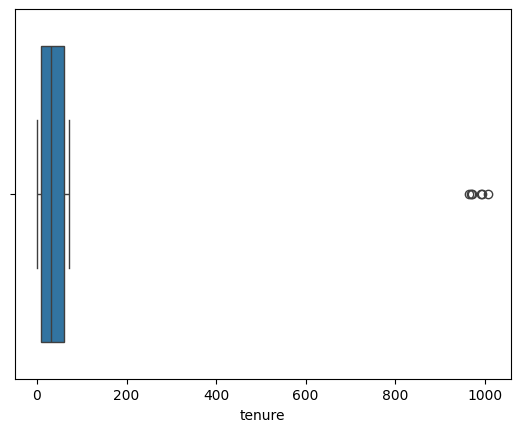

In [57]:
# outlier detection using boxplot

import seaborn as sns

sns.boxplot(x=churn1['tenure'])



In [59]:
# Replacing outliers with the median value of column "tenure"

churn1["tenure"] = np.where(churn1["tenure"] >= 500, churn1["tenure"].median(), churn1["tenure"])

In [60]:
# checking the summary again
churn1['tenure'].describe()

count    250.000000
mean      33.084000
std       25.024946
min        1.000000
25%        8.250000
50%       30.250000
75%       57.750000
max       72.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure'>

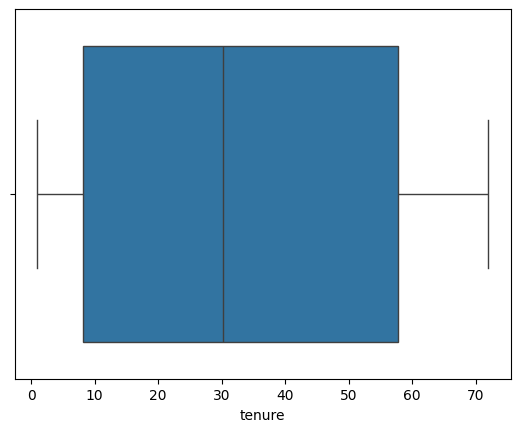

In [61]:
sns.boxplot(x=churn1['tenure'])

# identifying missing values

In [62]:
# To check the count of missing values present in each column
churn1.isnull().sum()

# Missing values in SeniorCitizen, MonthlyCharges, TotalCharges
#
# Imputing missing values


customerID           0
gender               0
SeniorCitizen        5
Partner              0
Dependents           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges        15
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64

In [63]:

# Two ways of approach
# - Fill the missing values by mean / median, in case of numerical variable
# - Fill the missing values with the class which has maximum count, in case of
# categorical variable


# Mode imputation - SeniorCitizen

churn1['SeniorCitizen'].fillna(churn1['SeniorCitizen'].mode()[0], inplace = True)

churn1.SeniorCitizen.isnull().sum()

C:\Users\admin\AppData\Local\Temp\ipykernel_2876\136874759.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn1['SeniorCitizen'].fillna(churn1['SeniorCitizen'].mode()[0], inplace = True)


np.int64(0)

In [64]:
# Look at the description to know whether numerical variables should be
# imputed with mean or median

# DataFrame.describe() - generates descriptive statistics that summarize
# central tendency, dispersion and shape of a dataset's distribution,
# excluding NaN values

churn1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,250.000000,250.000000,240.000000,235.000000
mean,0.136000,33.084000,63.694792,2307.926809
std,0.343476,25.024946,30.730847,2292.524824
min,0.000000,1.000000,3.500000,18.850000
25%,0.000000,8.250000,33.937500,447.250000
50%,0.000000,30.250000,70.925000,1337.500000
75%,0.000000,57.750000,89.150000,3883.775000
max,1.000000,72.000000,115.100000,8337.450000


<Axes: xlabel='TotalCharges', ylabel='Churn'>

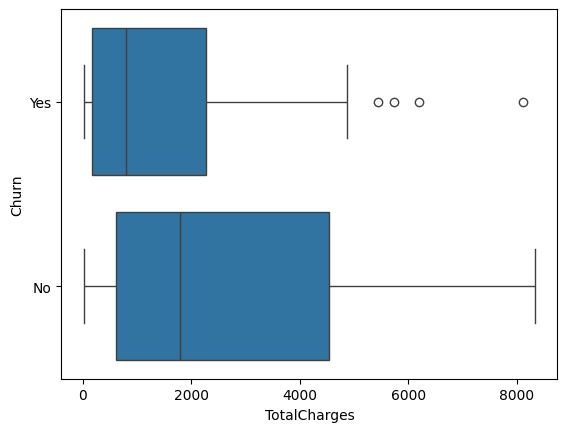

In [69]:
# Mean imputation - TotalCharges

churn1['TotalCharges'].mean()

sns.boxplot(x = churn1['TotalCharges'], y = churn1['Churn' ])


In [71]:

# Ensure TotalCharges is numeric
churn1['TotalCharges'] = pd.to_numeric(churn1['TotalCharges'], errors='coerce')

# Let us impute those missing values using mean based on the output
# variable 'Churn' - Yes & No

churn1.groupby(['Churn']).mean().groupby('Churn')['TotalCharges'].mean()



churn1.TotalCharges.isnull().sum()

TypeError: agg function failed [how->mean,dtype->object]

In [72]:
churn1['TotalCharges'] = churn1.groupby('Churn')['TotalCharges']\
.transform(lambda x: x.fillna(x.mean()))

In [73]:
churn1.TotalCharges.isnull().sum()

np.int64(0)

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

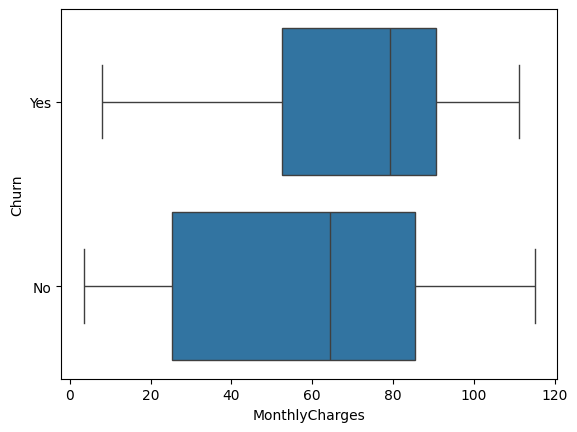

In [74]:
churn1["MonthlyCharges"].mean()

sns.boxplot(x = churn1['MonthlyCharges'], y = churn1['Churn' ])

In [76]:
# let us impute those missing values using mean based on the output
# variable 'Churn' - Yes & No

churn1.groupby(['Churn']).mean().groupby('Churn')['MonthlyCharges'].mean()





TypeError: agg function failed [how->mean,dtype->object]

In [77]:
churn1['MonthlyCharges'] = churn1.groupby('Churn')['MonthlyCharges']\
.transform(lambda x: x.fillna(x.mean()))

In [78]:
churn1.MonthlyCharges.isnull().sum()

np.int64(0)

# sampling

## random sampling with replacement

In [79]:
import random 



In [80]:
p1 = list(range(1,20))
print(p1)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [82]:
SRSWR = random.sample(population = p1 , k = 10)
SRSWR
# if the sample size is larger than the population size, then value error will be raised


[2, 8, 12, 5, 4, 16, 3, 10, 13, 6]

## random sampling without replacement

In [84]:
p2 = list(range(1,25))
p2

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [85]:
SRSWOR = random.sample(population = p2 , k = 10)
SRSWOR

[21, 1, 6, 15, 17, 10, 16, 19, 14, 3]

In [86]:
# MODULE OUTCOMES
#1. Importing from different formats
#2. Joins in python
#3. Basic descriptive analysis of data - to check the data type
#4. Convert to valid data types
#5. Consistency checks, unique values and regular expression patterns
#6. Logical checks for outliers
#7. Filling missing data - avg of all data, avg of data in categories,
## apply Lambda
#8. Outlier detection
#9. Sampling methods - random (w.o.r,w.r), stratified